# Домашнє завдання: Побудова класифікатора сентименту на основі набору даних Tweet Sentiment Extraction

**Мета:** Провести аналіз набору даних, виконати векторизацію текстових даних за допомогою методів bag-of-words та TF-IDF, порівняти їх, побудувати класифікатор та провести аналіз помилок.

**Набір даних:**
Дані беремо з цього змагання на Kaggle: https://www.kaggle.com/competitions/tweet-sentiment-extraction/data?select=train.csv

Оригінальне змагання має дещо іншу задачу, але ми будемо поки будувати саме класифікатор.

### Завдання 1. Завантаження та ознайомлення з набором даних

- Завантажте набір даних `train.csv` з посилання та ознайомтеся з його структурою.
- Виведіть перші 5 рядків та основну статистику: кількість записів, типи колонок, кількість пропущених значень.
- Видаліть записи, в яких є пропущені значення.



In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
train_fname = 'tweet_sentiment_train.csv.zip'
raw_df = pd.read_csv(train_fname)

In [37]:
raw_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


### Завдання 2. Exploratory Data Analysis

- Проведіть аналіз кількості класів та розподілу міток. Класи знаходяться в колонці `sentiment`.
- Візуалізуйте розподіл довжин текстів в символах та зробіть висновок про довжини постів: якої довжини постів найбільше, що бачите з розподілу?



In [40]:
raw_df.sentiment.value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [42]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [44]:
raw_df = raw_df.dropna()

тепер у нас немає пропущених значень. Датафрейм складається з 27 тис рядків і 4 колонокю. Є три класи зі співвідношенням приблизно 2:1:1 з переважанням нейтрального классу

(array([1231., 3338., 4002., 3818., 3175., 2952., 2554., 2182., 2584.,
        1644.]),
 array([  3. ,  16.8,  30.6,  44.4,  58.2,  72. ,  85.8,  99.6, 113.4,
        127.2, 141. ]),
 <BarContainer object of 10 artists>)

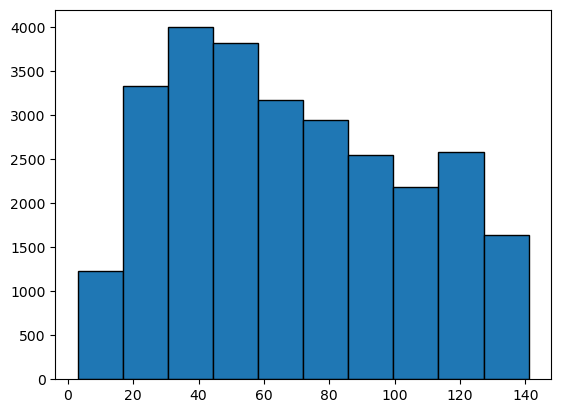

In [47]:
raw_df['symbol_count'] = raw_df['text'].apply(len)

plt.hist(raw_df['symbol_count'], bins=10, edgecolor='black')

переважна кількість символів у комментах від 20 до 90 приблизно 

### Завдання 3. Попередня обробка текстових даних та векторизація з bag of words


Наша задача тут отримати вектори методом bag of words колонки `text`, виконавши попередню обробку тексту.
Попередня обробка має включати
- видалення stopwords необхідної мови
- токенізація (розбиття текстів на фрагменти по 1 слову)
- стеммінг слів зі `SnowballStemmer`.
- самостійно задайте кількість слів в словнику для `sklearn.feature_extraction.text.CountVectorizer`. Можливо для цього доведеться виконати додатковий аналіз.

Ви також можете додати сюди додаткові методи очистки текстів, наприклад, видалення деяких символів чи груп символів, якщо в процесі роботи побачите, що хочете щось видалити.

Напишіть код аби виконати це завдання. Перед цим рекомендую детально ознайомитись з тим, що робить обʼєкт `sklearn.feature_extraction.text.CountVectorizer` за замовченням.

Це завдання можна виконати двома способами - один - максимально подібно до того, як ми це робили в лекції, другий - дещо інакше перегрупувавши етапи обробки тексту.




#### токенізація (розбиття текстів на фрагменти по 1 слову) та видалення stopwords необхідної мови

In [52]:
# pip install nltk

In [87]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/studio/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [58]:
english_stopwords = stopwords.words('english')

In [68]:
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [113]:
raw_df['text_tok_stp'] = raw_df['text'].apply(lambda x: remove_stopwords(word_tokenize(x)))

In [99]:
raw_df

,textID,text,selected_text,sentiment,symbol_count,text_stp
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,"[`, responded, ,, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,"[Sooo, SAD, miss, San, Diego, !, !, !]"
2,088c60f138,my boss is bullying me...,bullying me,negative,25,"[boss, bullying, ...]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,"[interview, !, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,"[Sons, *, *, *, *, ,, `, put, releases, alread..."
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,77,"[wish, could, come, see, u, Denver, husband, l..."
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,122,"[`, wondered, rake, ., client, made, clear, .N..."
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,111,"[Yay, good, ., Enjoy, break, -, probably, need..."
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,27,"[worth, *, *, *, *, .]"


#### стеммінг слів зі SnowballStemmer

In [104]:
from nltk.stem.snowball import SnowballStemmer

In [107]:
stemmer = SnowballStemmer(language='english')

In [109]:
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

In [115]:
raw_df['text_stem'] = raw_df['text_tok_stp'].apply(lambda x: stem_words(x))

In [138]:
raw_df.sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

#### Vectorizer

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
raw_df['text_stem_joined'] = raw_df['text_stem'].apply(lambda x: ' '.join(x))

In [132]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(raw_df['text_stem_joined'])

count_matrix = X.toarray()

feature_names = vectorizer.get_feature_names_out()

### Завдання 4. Побудова класифікатора

- Розділіть індекси даних на навчальний та тестовий набори в обраному співвівдношенні. Використовуючи отримані індекси сфомуйте набори для тренування класифікатора `X_train_bow, X_test_bow, y_train, y_test`.
- Навчіть класифікатор (наприклад, Logistic Regression, Decision Tree або один з алгоритмів бустингу) на даних, векторизованих методом bag-of-words. Спробуйте кілька моделей і оберіть найбільш точну :)
- Виведіть інформацію, яка дає можливість оцінити якість класифікації.
- Оцініть якість фінальної класифікації: вона хороша чи не дуже?



In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# 1. Кодування міток сентименту
label_encoder = LabelEncoder()
raw_df['sentiment_encoded'] = label_encoder.fit_transform(raw_df['sentiment'])

# 2. Поділ на навчальний та тестовий набори
X = raw_df['text_stem_joined'] 
y = raw_df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Векторизація тексту методом Bag-of-Words (CountVectorizer)
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# 4. Спробуємо кілька моделей

# Модель 1: Логістична регресія
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_bow, y_train)
y_pred_logreg = logreg.predict(X_test_bow)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Модель 2: Дерево рішень
tree = DecisionTreeClassifier()
tree.fit(X_train_bow, y_train)
y_pred_tree = tree.predict(X_test_bow)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Модель 3: Градієнтний бустинг
boost = GradientBoostingClassifier()
boost.fit(X_train_bow, y_train)
y_pred_boost = boost.predict(X_test_bow)
accuracy_boost = accuracy_score(y_test, y_pred_boost)

# 5. Виведемо звіти з метриками для всіх моделей
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_logreg:.4f}\n")

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_tree:.4f}\n")

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_boost, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_boost:.4f}\n")

# 6. Оцінка моделей
best_model = max([("Logistic Regression", accuracy_logreg), 
                  ("Decision Tree", accuracy_tree), 
                  ("Gradient Boosting", accuracy_boost)], key=lambda x: x[1])

print(f"Найбільш точна модель: {best_model[0]} з точністю {best_model[1]:.4f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.60      0.64      1572
     neutral       0.63      0.72      0.67      2236
    positive       0.76      0.72      0.74      1688

    accuracy                           0.68      5496
   macro avg       0.69      0.68      0.68      5496
weighted avg       0.69      0.68      0.68      5496

Accuracy: 0.6843

Decision Tree Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.63      0.64      1572
     neutral       0.65      0.66      0.66      2236
    positive       0.70      0.71      0.71      1688

    accuracy                           0.67      5496
   macro avg       0.67      0.67      0.67      5496
weighted avg       0.67      0.67      0.67      5496

Accuracy: 0.6668

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    negative       0.78   

### Завдання 5. Аналіз впливовості слів в отриманого класифікатора

- Для обраної вами моделі проведіть аналіз важливості слів (ознак): які слова (токени) найбільше впливають для визначення сентименту? Чи це логічно на ваш погляд, що саме ці символи впливають найбільше/найменще?



Топ 10 слів для сентименту 'negative':
Найбільший позитивний вплив:
sad         2.662491
suck        2.480719
bore        2.405341
sorri       2.254786
hate        2.242279
miss        2.134519
fail        2.065498
shame       2.030803
unfortun    1.970189
stupid      1.962236
Name: negative, dtype: float64

Найбільший негативний вплив:
glad      -2.264426
awesom    -2.240362
love      -2.059358
thank     -1.933347
cute      -1.860034
congrat   -1.817927
welcom    -1.701237
bless     -1.673356
beauti    -1.622388
amaz      -1.608951
Name: negative, dtype: float64

Топ 10 слів для сентименту 'neutral':
Найбільший позитивний вплив:
chan       1.510057
nigga      1.302804
parvo      1.295474
hummmmm    1.158473
gent       1.150372
satisfi    1.060297
idol       1.044750
logic      1.039480
jst        1.038291
67hac      1.036433
Name: neutral, dtype: float64

Найбільший негативний вплив:
piss        -1.459270
congratul   -1.453616
delici      -1.355856
thrill      -1.351993
4am         -

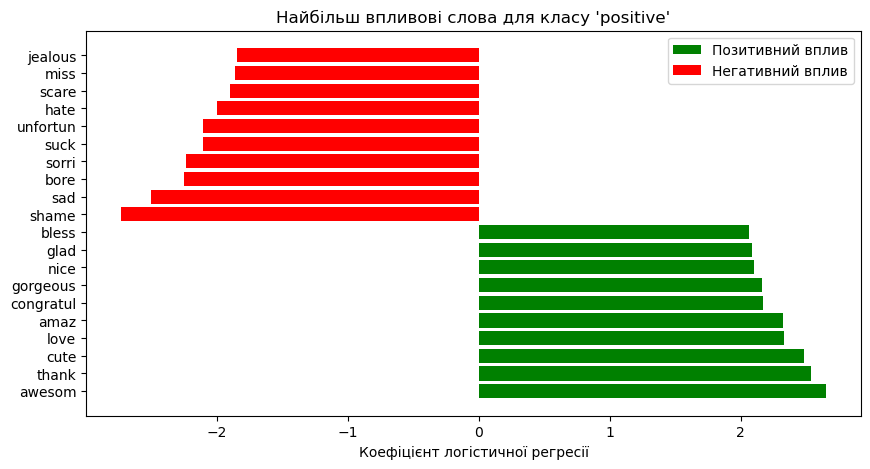

In [142]:
import numpy as np

coefficients = logreg.coef_ 
feature_names = vectorizer.get_feature_names_out()

importance_df = pd.DataFrame(coefficients.T, index=feature_names, columns=label_encoder.classes_)

for sentiment in label_encoder.classes_:
    print(f"\nТоп 10 слів для сентименту '{sentiment}':")
    
    top_positive = importance_df[sentiment].nlargest(10)
    top_negative = importance_df[sentiment].nsmallest(10)
    
    print("Найбільший позитивний вплив:")
    print(top_positive)
    
    print("\nНайбільший негативний вплив:")
    print(top_negative)
    
top_words_positive = importance_df['positive'].nlargest(10)
top_words_negative = importance_df['positive'].nsmallest(10)

plt.figure(figsize=(10, 5))

plt.barh(top_words_positive.index, top_words_positive.values, color='green', label='Позитивний вплив')
plt.barh(top_words_negative.index, top_words_negative.values, color='red', label='Негативний вплив')

plt.xlabel('Коефіцієнт логістичної регресії')
plt.title("Найбільш впливові слова для класу 'positive'")
plt.legend()
plt.show()

### Завдання 6. Векторизація текстів з допомогою TF-IDF. Тренування класифікатора, аналіз точності і впливовості слів.

- Проведіть векторизацію текстів з векторизатором TfidfVectorizer. Реалізуйте векторизацію так, аби препроцесинг включав всі ті самі кроки, що і в випадку використання векторизації Bag of Words.

- Натренуйте той самий класифікатор на TF-IDF векторах, виконавши розбивку набору даних на train, test так, аби в трейні були всі ті самі записи, що і були в попередньому завданні (це важливо для порівняння результатів).

- Проаналізуйте якість класифікації вивівши потрібні для цього метрики. Чи стала якість класифікації кращою?

- Які токени найбільше впливають на результат при тренуваннні класифікатора з TF-IDF векторами? Порівняйте з найважливішими токенами при Bag of Words векторизації. Яку векторизацію ви б обрали для фінальної імплементації рішення? Обґрунтуйте свій вибір.



TF-IDF Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.57      0.63      1572
     neutral       0.62      0.74      0.68      2236
    positive       0.76      0.70      0.73      1688

    accuracy                           0.68      5496
   macro avg       0.70      0.67      0.68      5496
weighted avg       0.69      0.68      0.68      5496

Accuracy: 0.6818

Точність Bag-of-Words: 0.6843
Точність TF-IDF: 0.6818

Топ 10 слів для сентименту 'negative' (TF-IDF):
Найбільший позитивний вплив:
sad       5.652523
miss      5.413508
hate      4.609451
suck      4.608539
sorri     4.549018
bore      4.094784
fail      3.702645
stupid    3.493853
hurt      3.452273
poor      3.428780
Name: negative, dtype: float64

Найбільший негативний вплив:
love     -4.951704
thank    -4.079850
awesom   -3.435801
hope     -3.435366
great    -2.974338
nice     -2.819450
glad     -2.699791
better   -2.521691
cute     -2.3012

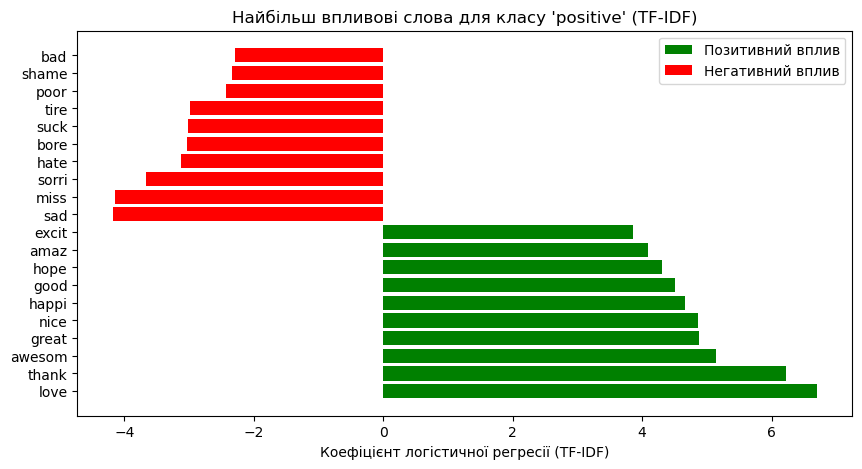

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

logreg_tfidf = LogisticRegression(max_iter=1000)
logreg_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("TF-IDF Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_tfidf, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_tfidf:.4f}\n")

print(f"Точність Bag-of-Words: {accuracy_logreg:.4f}")
print(f"Точність TF-IDF: {accuracy_tfidf:.4f}")

tfidf_coefficients = logreg_tfidf.coef_
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_importance_df = pd.DataFrame(tfidf_coefficients.T, index=tfidf_feature_names, columns=label_encoder.classes_)

for sentiment in label_encoder.classes_:
    print(f"\nТоп 10 слів для сентименту '{sentiment}' (TF-IDF):")
    top_positive_tfidf = tfidf_importance_df[sentiment].nlargest(10)
    top_negative_tfidf = tfidf_importance_df[sentiment].nsmallest(10)

    print("Найбільший позитивний вплив:")
    print(top_positive_tfidf)

    print("\nНайбільший негативний вплив:")
    print(top_negative_tfidf)

top_words_positive_tfidf = tfidf_importance_df['positive'].nlargest(10)
top_words_negative_tfidf = tfidf_importance_df['positive'].nsmallest(10)

plt.figure(figsize=(10, 5))
plt.barh(top_words_positive_tfidf.index, top_words_positive_tfidf.values, color='green', label='Позитивний вплив')
plt.barh(top_words_negative_tfidf.index, top_words_negative_tfidf.values, color='red', label='Негативний вплив')

plt.xlabel('Коефіцієнт логістичної регресії (TF-IDF)')
plt.title("Найбільш впливові слова для класу 'positive' (TF-IDF)")
plt.legend()
plt.show()

### Завдання 7. Аналіз помилок класифікації з векторизацією TF-IDF.

- Проаналізуйте, на яких екземплярах помиляється класифікатор при векторизації TF-IDF.
- На основі аналізу запропонуйте 3 шляхи поліпшення якості класифікації.

найбільше помиляється на негативному классі.

І на фінал кернел для натхнення і ознайомлення з рішенням оригінальної задачі. Багато цікавих візуалізацій і аналізу є тут, а також тут розвʼязується саме проблема named entitty recognition і можна ознайомитись як це робиться - вона дещо складніша по своїй суті ніж класифікація, подумайте, чому:

https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model